In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
drug_data = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv')
drug_data

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [0]:
drug_use_percent = drug_data[['age', 'marijuana-use','cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use' ]]
drug_use_percent

,age,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


In [0]:
drug_data_use = pd.melt(drug_use_percent, 'age')
df_26_29 = drug_data_use[drug_data_use['age']=='26-29']
df_26_29_table = df_26_29.rename(columns={'variable': 'Drugs', 'value': ' Percent'})
df_26_29_table

,age,Drugs,Percent
12,26-29,marijuana-use,20.8
29,26-29,cocaine-use,3.2
46,26-29,crack-use,0.4
63,26-29,heroin-use,0.6
80,26-29,hallucinogen-use,3.2
97,26-29,inhalant-use,0.6
114,26-29,pain-releiver-use,8.3
131,26-29,oxycontin-use,1.2
148,26-29,tranquilizer-use,4.2
165,26-29,stimulant-use,2.3


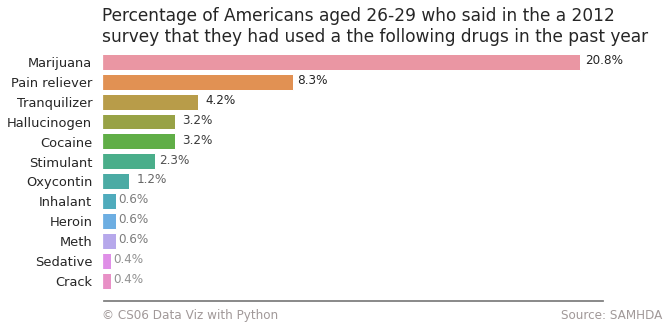

In [0]:
#Create Boxplot with seaborn
drug_use =sns.barplot(x=' Percent', y='Drugs', data=df_26_29_table, order=['marijuana-use', 'pain-releiver-use', 'tranquilizer-use','hallucinogen-use', 'cocaine-use', 'stimulant-use', 'oxycontin-use', 'inhalant-use', 'heroin-use', 'meth-use', 'sedative-use', 'crack-use'])

#Set Names for Axis Labels
drug_use.set_yticklabels(labels = ['Marijuana', 'Pain reliever', 'Tranquilizer', 'Hallucinogen', 'Cocaine', 'Stimulant', 'Oxycontin', 'Inhalant', 'Heroin', 'Meth', 'Sedative', 'Crack'], fontsize=13)
drug_use.set(xticklabels=[], ylabel=None)


# Adding a title
drug_use.text(x = 0, y= -1,
              s = 'Percentage of Americans aged 26-29 who said in the a 2012\nsurvey that they had used a the following drugs in the past year',
              fontsize = 17, alpha = 1)

#Set Background Color of Boxplot
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'figure.figsize':(9,5)})

# Bold horizontal line at y=0
drug_use.axhline(y=12, alpha=0.6, linewidth = -1.5, color='black')

# Adding a signature bar
drug_use.xaxis.label.set_visible(False)

drug_use.text(x=0,
              y=12.9,
              s="""© CS06 Data Viz with Python               """
                + """                                                          """
                + """Source: SAMHDA""",
              fontsize=12,
              color='#a19999',
              backgroundcolor='white'
              )

# Add % labels to each bar
drug_use.text(x=21, y=0.1, s='20.8%', fontsize=12, alpha=1)
drug_use.text(x=8.5, y=1.1, s='8.3%', fontsize=12, alpha=1)
drug_use.text(x=4.5, y=2.1, s='4.2%', fontsize=12, alpha=1)
drug_use.text(x=3.5, y=3.1, s='3.2%', fontsize=12, alpha=.9)
drug_use.text(x=3.5, y=4.1, s='3.2%', fontsize=12, alpha=.9)
drug_use.text(x=2.5, y=5.1, s='2.3%', fontsize=12, alpha=.8)
drug_use.text(x=1.5, y=6.1, s='1.2%', fontsize=12, alpha=.7)
drug_use.text(x=0.7, y=7.1, s='0.6%', fontsize=12, alpha=.6)
drug_use.text(x=0.7, y=8.1, s='0.6%', fontsize=12, alpha=.6)
drug_use.text(x=0.7, y=9.1, s='0.6%', fontsize=12, alpha=.6)
drug_use.text(x=0.5, y=10.1, s='0.4%', fontsize=12, alpha=.5)
drug_use.text(x=0.5, y=11.1, s='0.4%', fontsize=12, alpha=.5)


plt.show()